In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [46]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 495.5 kB/s eta 0:04:12
   ---------------------------------------- 0.2/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.6/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.4/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.1/124.9 MB 8.4 MB/s eta 0:00:15
    --------------------------------------- 2.8/124.9 MB 9.3 MB/s eta 0:00:14
   - -------------------------------------- 3.5/124.9 MB 10.2 MB/s eta 0:00:12
   - -------------------------------------- 4.1/124.9 MB 10.5 MB/s eta 0:00:12
   - --------------------

In [2]:
data = pd.read_csv("behavioural_dataset.csv")
data1=pd.read_csv("Electric_vehicle_dataset.csv")

In [3]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [33]:
data1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
data1['inr(10e3)']=data1['PriceEuro']*91.19

In [5]:
data1.rename(columns={'inr(10e3)': 'Price'},inplace=True)

In [6]:
data1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,5059221.20
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2735700.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,5146763.60
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,6204567.60
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,3008996.43


In [7]:
data1.drop('PriceEuro', axis=1,inplace=True)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  Price            103 non-null    float64
dtypes: float64(2), int64(4), object(8)
memory usage: 11.4+ KB


In [9]:
data1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,5059221.20
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,2735700.00
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,5146763.60
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,6204567.60
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,3008996.43


In [10]:
data1['Price']=data1['Price'].astype('int64')

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  Price            103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [12]:
data.shape


(99, 8)

In [13]:
data1.shape

(103, 14)

In [14]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,99.0,3.631313e+01,6.246054e+00,26.0,31.0,36.0,41.0,51.0
No of Dependents,99.0,2.181818e+00,1.335265e+00,0.0,2.0,2.0,3.0,4.0
Total Salary,99.0,2.270707e+06,1.050777e+06,200000.0,1550000.0,2100000.0,2700000.0,5200000.0
Price,99.0,1.194040e+06,4.376955e+05,110000.0,800000.0,1200000.0,1500000.0,3000000.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


#### Data Visualizations

<Axes: >

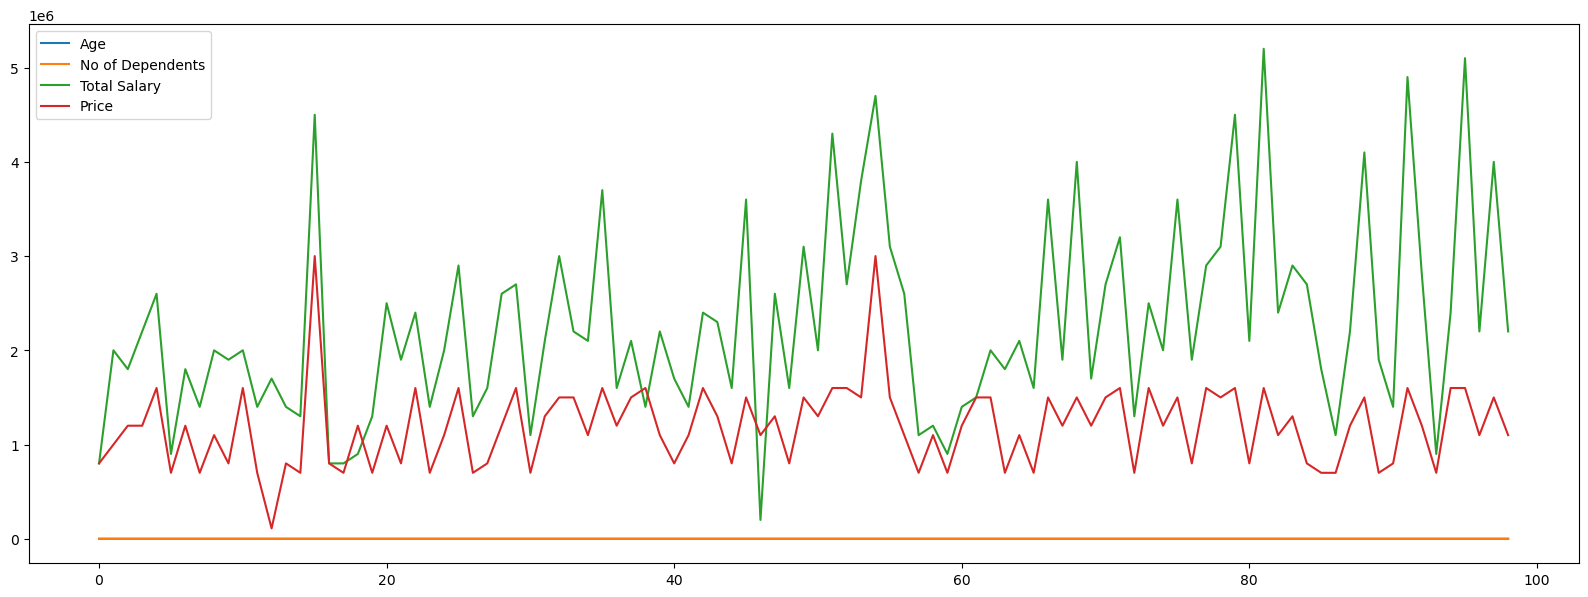

In [13]:
data.plot(figsize=(20,7))

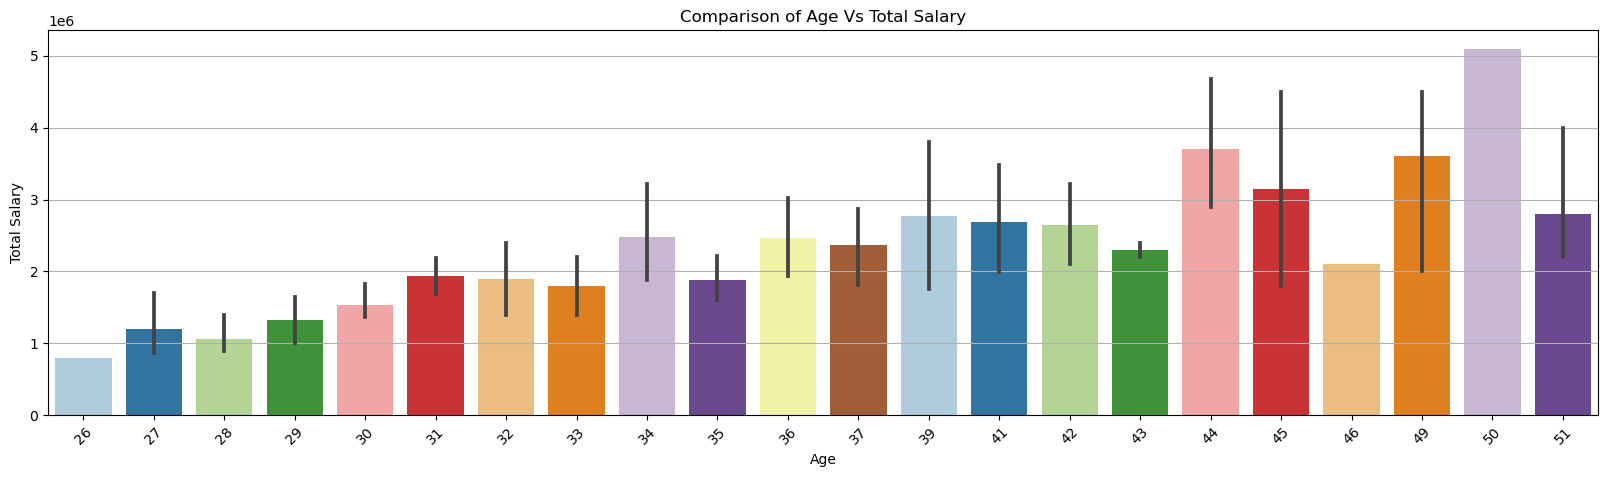

In [14]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Age',y='Total Salary',data=data,palette='Paired')
plt.grid(axis='y')
plt.title('Comparison of Age Vs Total Salary')
plt.xlabel('Age')
plt.ylabel('Total Salary')
plt.xticks(rotation=45)
plt.show()

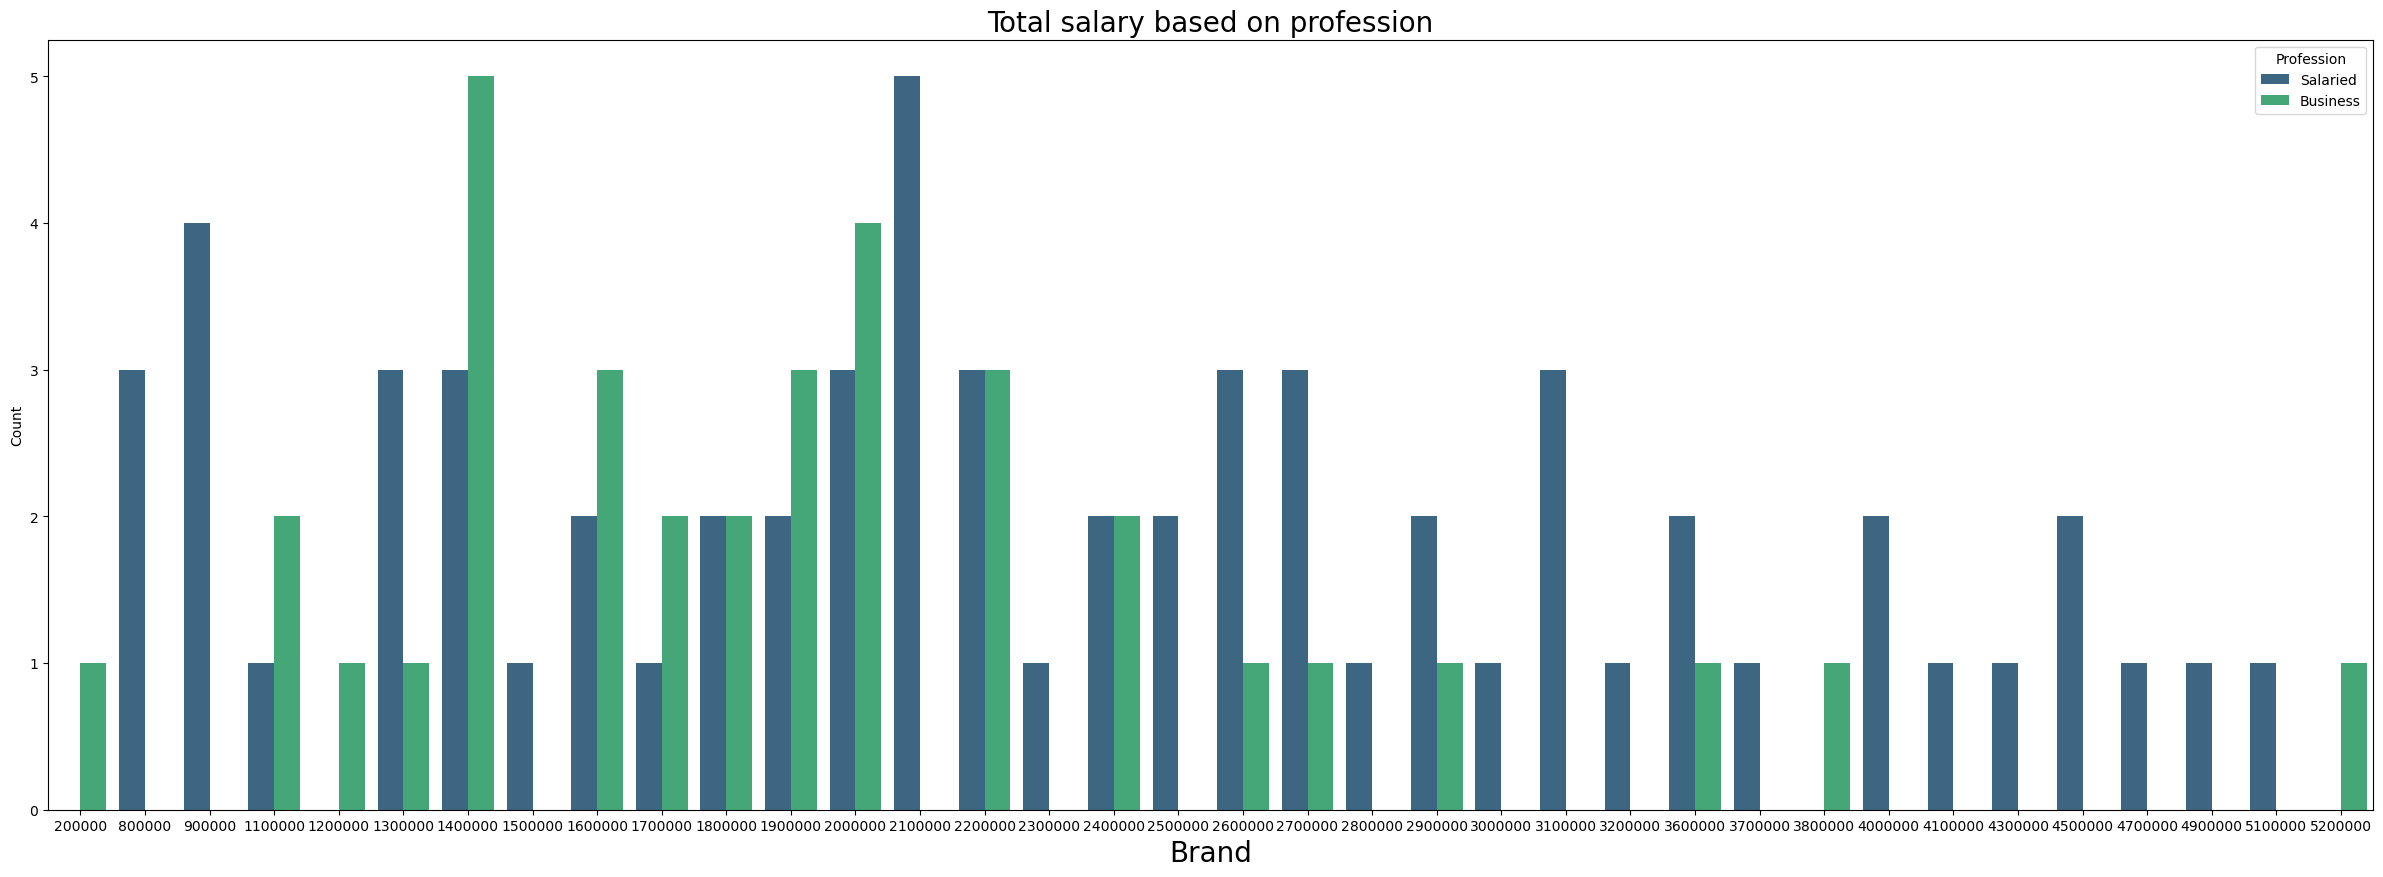

In [61]:
plt.figure(figsize=(30,10))
sns.countplot(x='Total Salary', hue = 'Profession', data=data, palette='viridis')
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Count')
plt.title('Total salary based on profession', fontsize=20)
plt.show()


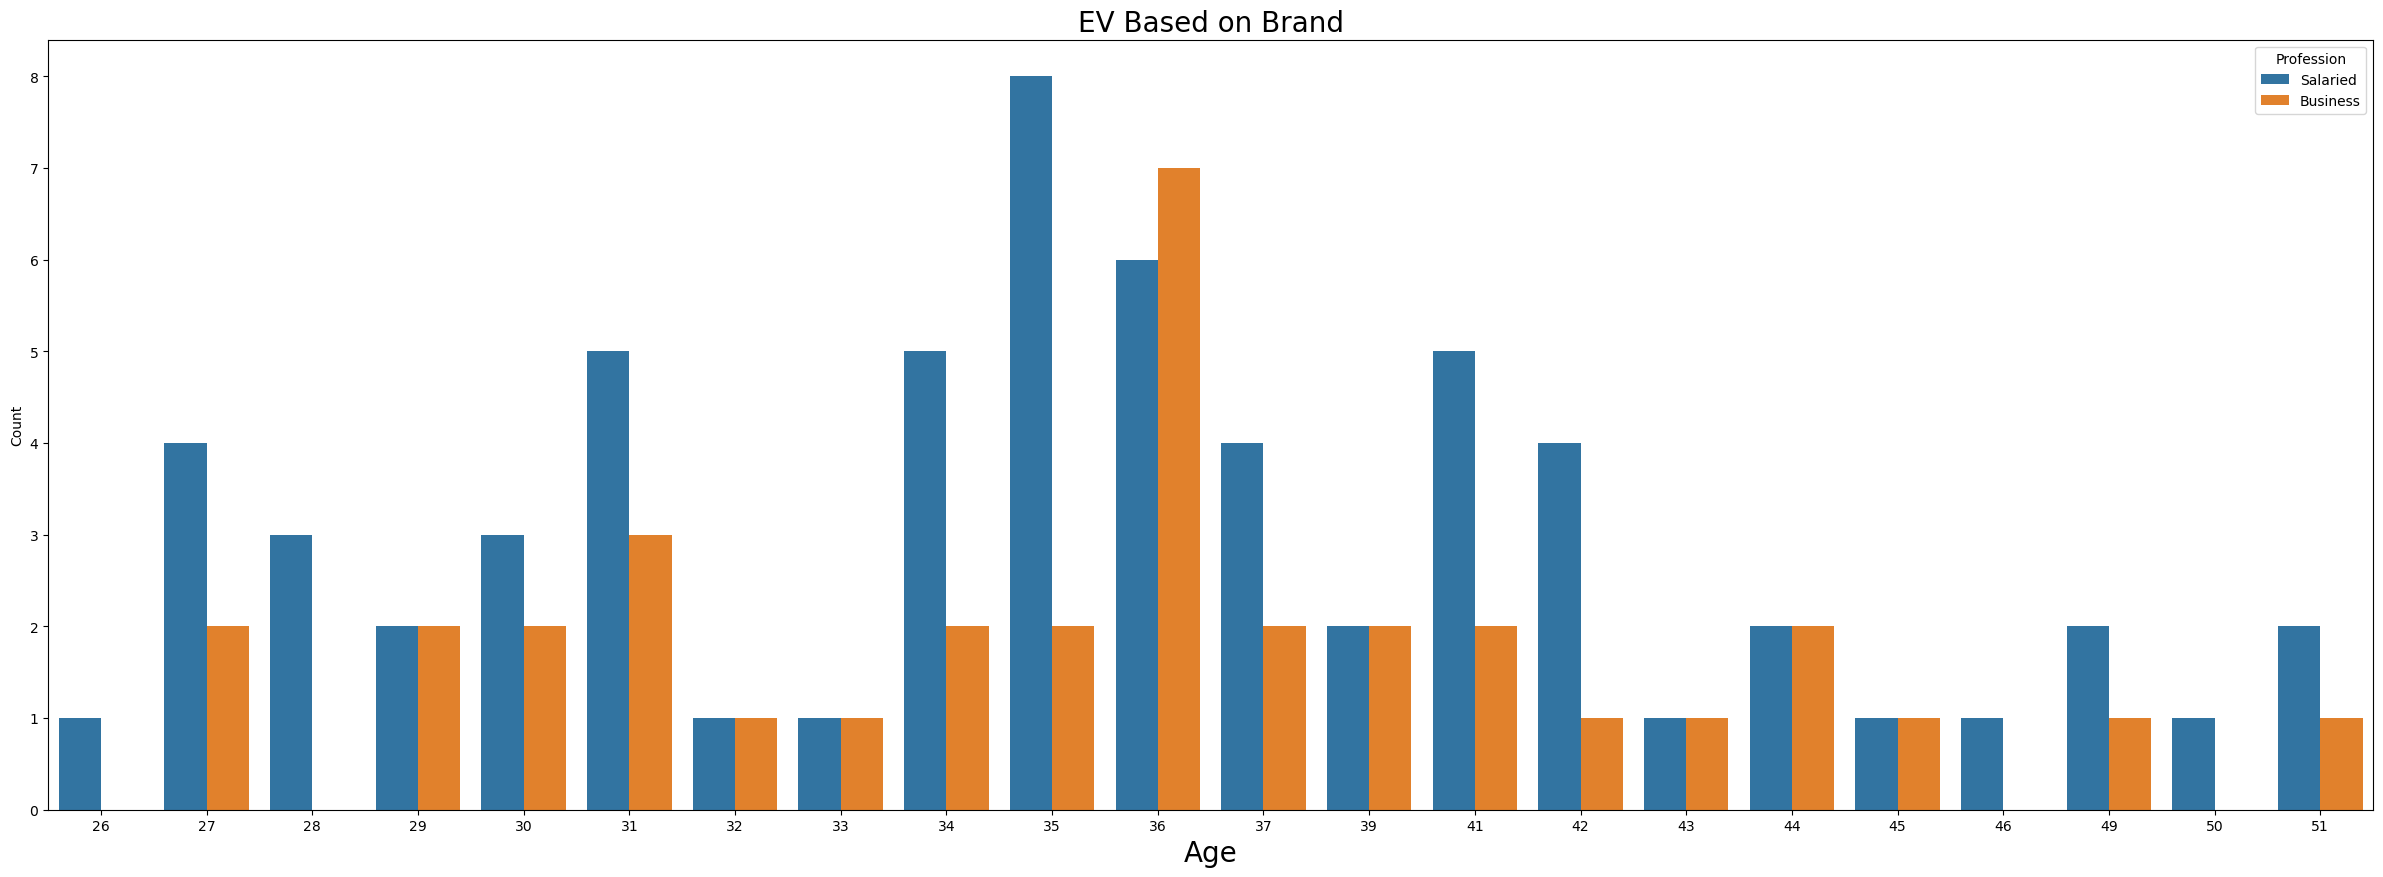

In [15]:
plt.figure(figsize=(30,10))
sns.countplot(x='Age', hue = 'Profession', data=data, palette='tab10')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count')
plt.title('EV Based on Brand', fontsize=20)
plt.show()

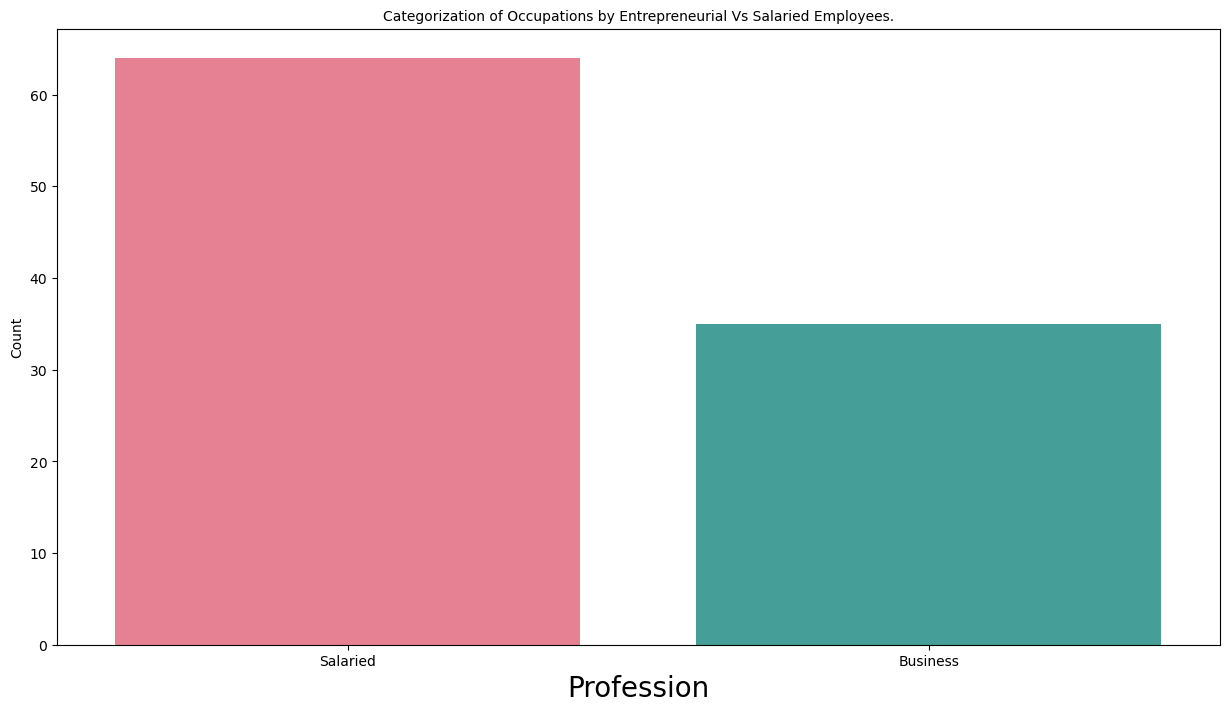

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='Profession', data=data, palette="husl")
plt.xlabel('Profession', fontsize=20)
plt.ylabel('Count')
plt.title('Categorization of Occupations by Entrepreneurial Vs Salaried Employees.', fontsize=10)
plt.show()

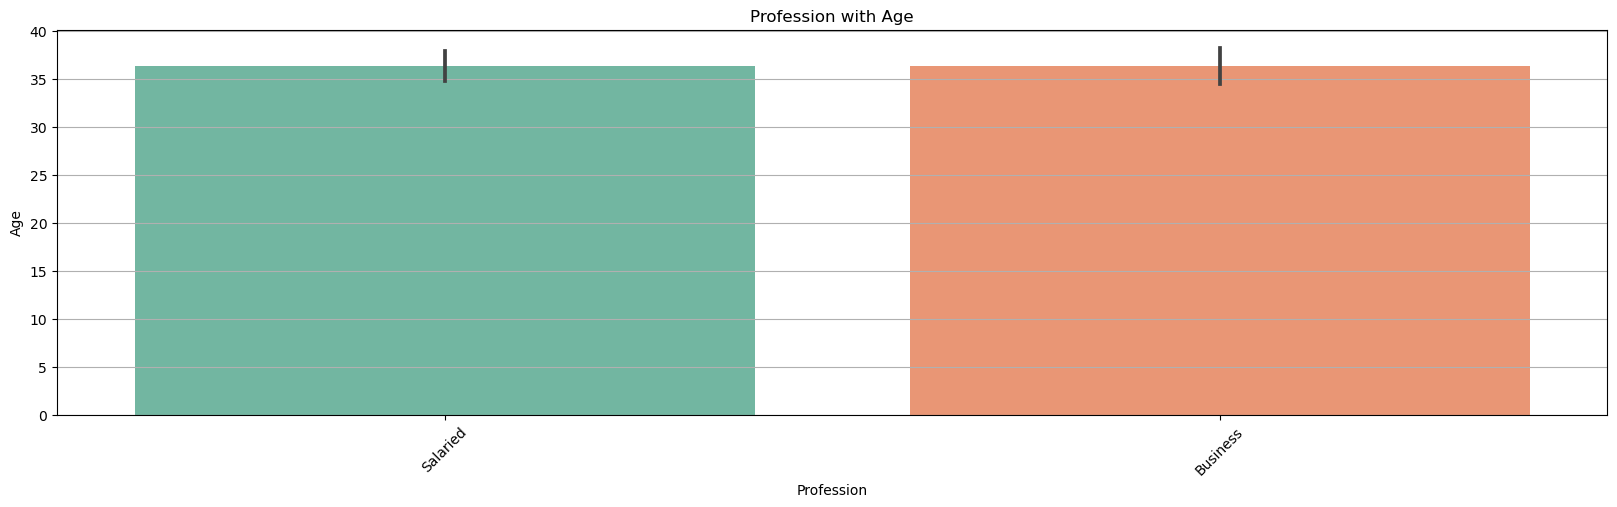

In [17]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Profession',y='Age',data=data,palette='Set2')
plt.grid(axis='y')
plt.title('Profession with Age')
plt.xlabel('Profession')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

In [18]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



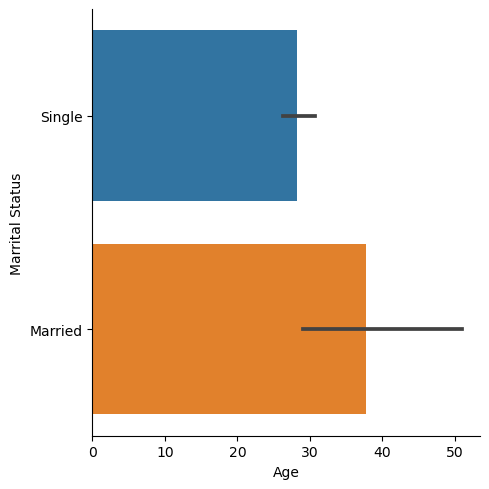

In [29]:
sns.catplot(data=data, x="Age", y="Marrital Status", errorbar=("pi", 95), kind="bar")

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



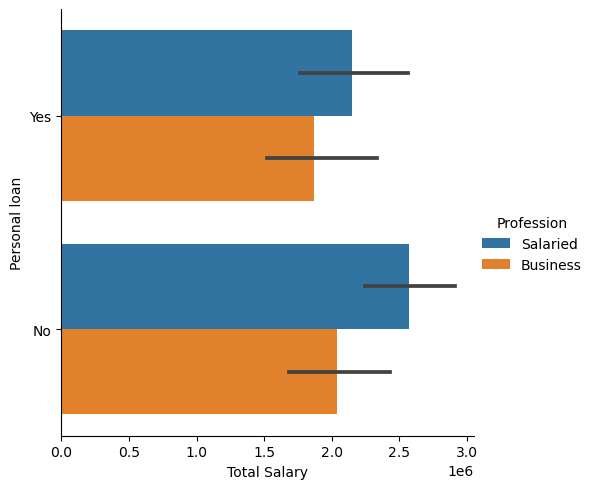

In [19]:
sns.catplot(data=data, x="Total Salary", y="Personal loan", hue="Profession", kind="bar")

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



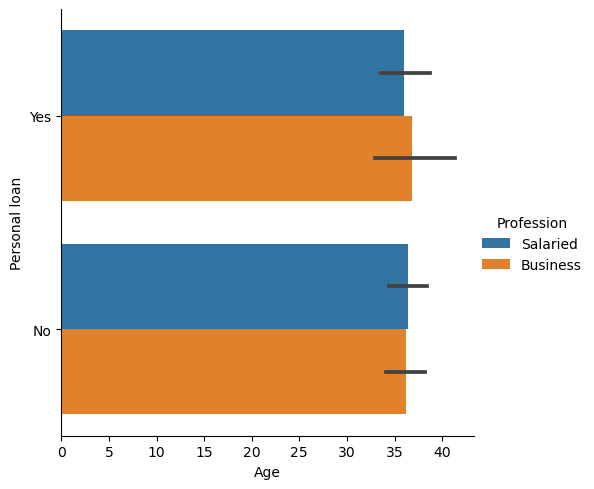

In [20]:
sns.catplot(data=data, x="Age", y="Personal loan", hue="Profession", kind="bar")

In [21]:
data['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

Text(0.5, 1.0, 'Education')

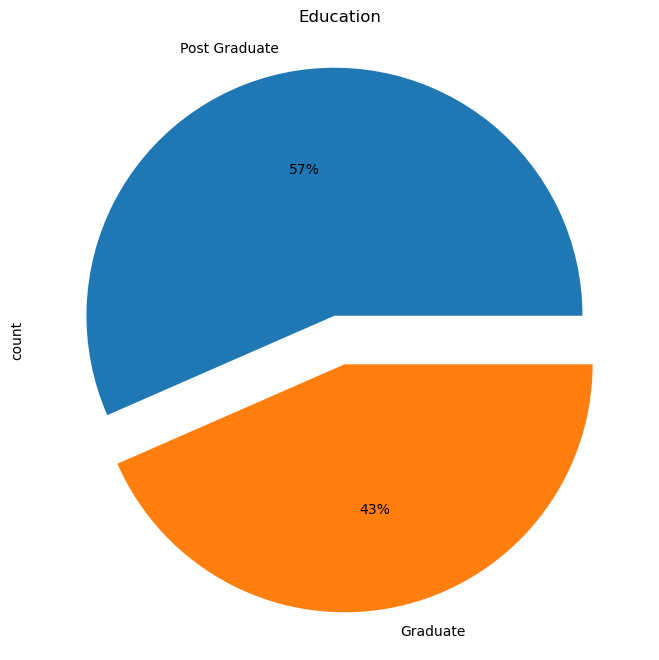

In [36]:
data['Education'].value_counts().plot.pie(figsize=(8,15), color='dark',autopct='%.0f%%',explode=(.1,.1,))
plt.title('Education') 

Text(0.5, 1.0, 'Marrital Status')

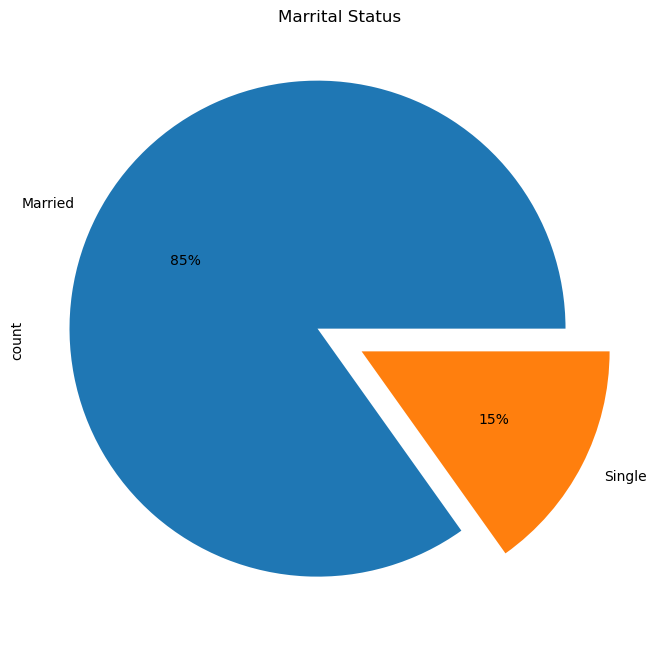

In [37]:
data['Marrital Status'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,))
plt.title('Marrital Status')

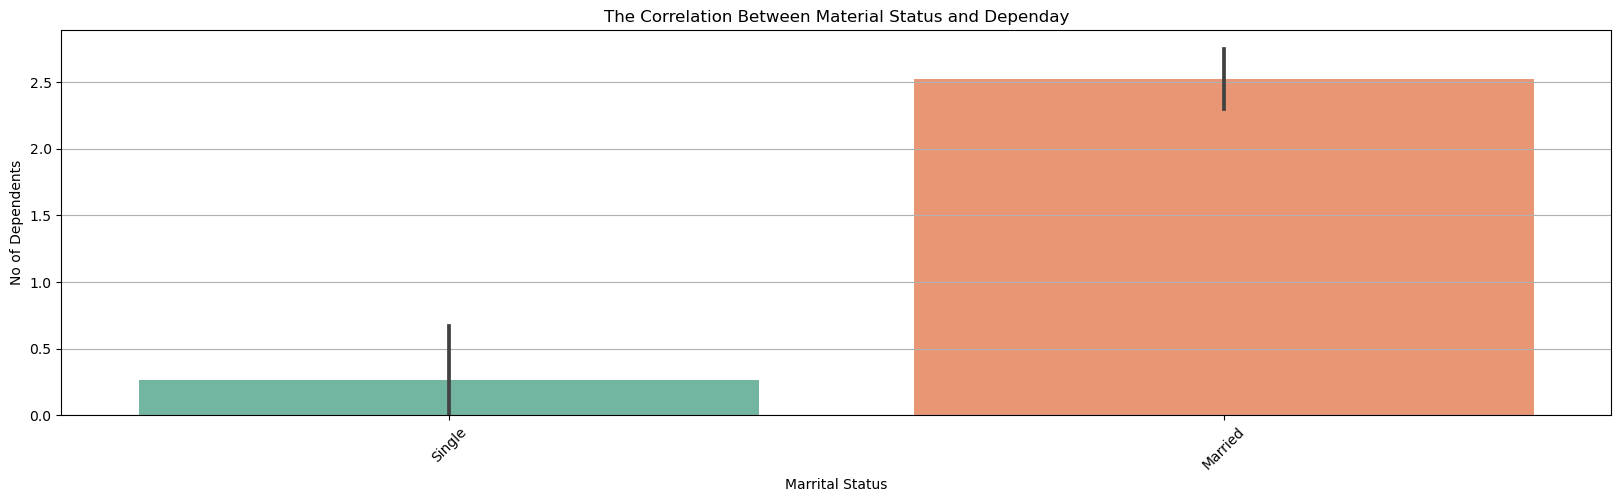

In [22]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Marrital Status',y='No of Dependents',data=data,palette='Set2')
plt.grid(axis='y')
plt.title('The Correlation Between Material Status and Dependay')
plt.xlabel('Marrital Status')
plt.ylabel('No of Dependents')
plt.xticks(rotation=45)
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [45]:
#num_col=['Age','No of Dependents',' Total Salary','Price']
#cat_col=['Profession','Marrital Status','Education','Personal loan']
# Creating dummy variables for categorical types
#data1=pd.get_dummies(data[cat_col])

C:\Users\Lenovo_ThinkPad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



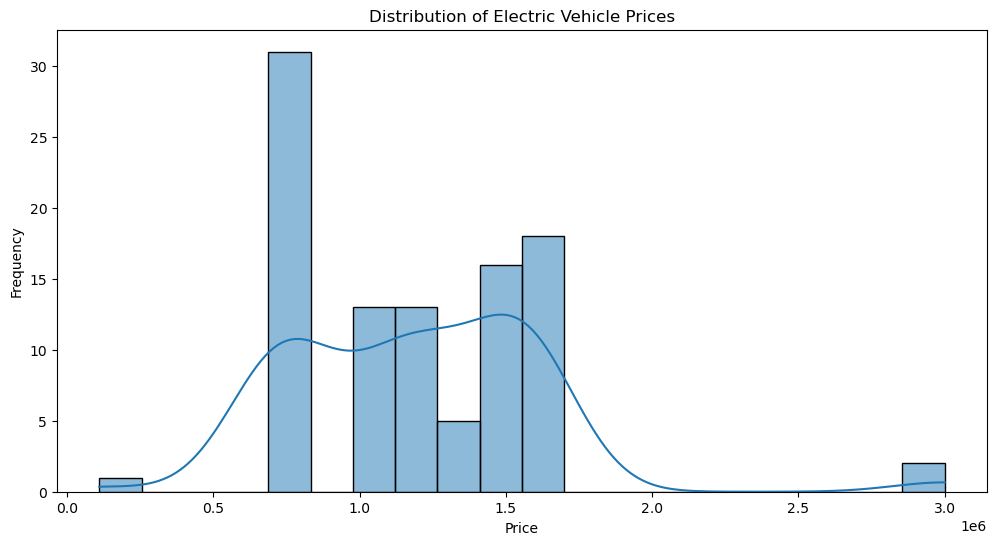

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Price'], bins=20, kde=True)
plt.title('Distribution of Electric Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [24]:
num_cols=data[['Age','No of Dependents','Total Salary','Price']].copy()

In [25]:
num_cols



,Age,No of Dependents,Total Salary,Price
0,27,0,800000,800000
1,35,2,2000000,1000000
2,45,4,1800000,1200000
3,41,3,2200000,1200000
4,31,2,2600000,1600000
...,...,...,...,...
94,27,0,2400000,1600000
95,50,3,5100000,1600000
96,51,2,2200000,1100000
97,51,2,4000000,1500000


<Axes: >

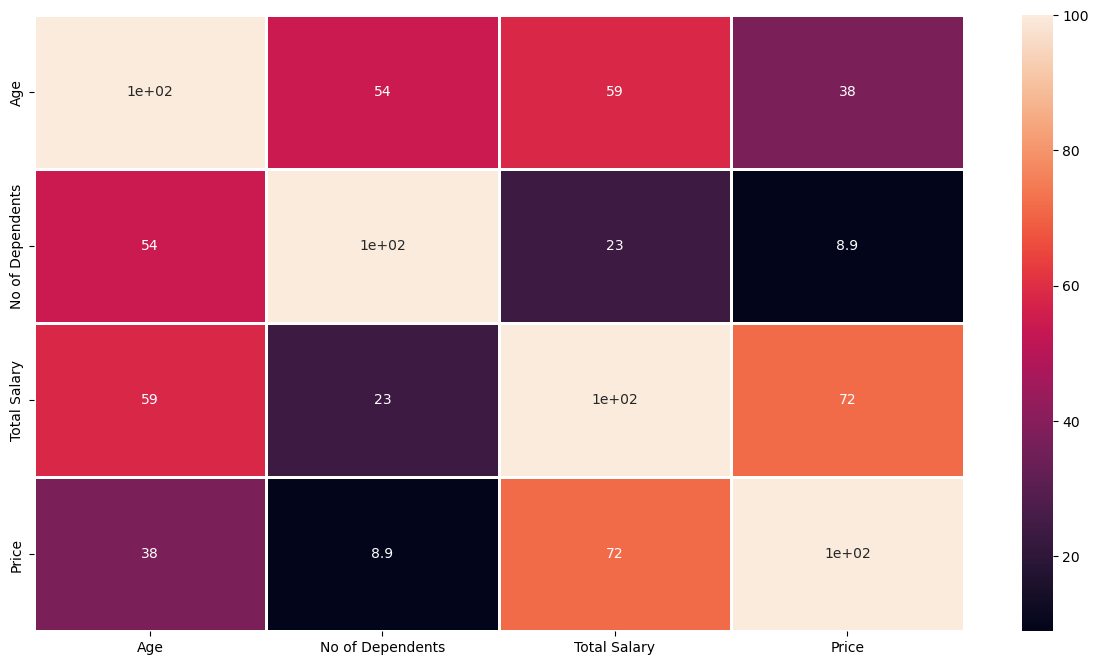

In [26]:
## Checking the corelation with heatmap
ax= plt.figure(figsize=(15,8))
sns.heatmap(num_cols.corr()*100,linewidths=1,linecolor='white',annot=True)

In [27]:
# Define features and target variable
x=data.drop('Price',axis=1)
y=data['Price']

In [28]:
x

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary
0,27,Salaried,Single,Post Graduate,0,Yes,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000
2,45,Business,Married,Graduate,4,Yes,1800000
3,41,Business,Married,Post Graduate,3,No,2200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000
...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000
95,50,Salaried,Married,Post Graduate,3,No,5100000
96,51,Business,Married,Graduate,2,Yes,2200000
97,51,Salaried,Married,Post Graduate,2,No,4000000


In [29]:
y

0      800000
1     1000000
2     1200000
3     1200000
4     1600000
       ...   
94    1600000
95    1600000
96    1100000
97    1500000
98    1100000
Name: Price, Length: 99, dtype: int64

In [30]:
# Define categorical and numerical columns
categorical_cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan']
numerical_cols = ['Age', 'No of Dependents', 'Total Salary']
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [31]:
# Transform the features
x_transformed=preprocessor.fit_transform(x)

In [32]:
##Display the transformed features
print(x_transformed[:5])

[[-1.4986304  -1.64231252 -1.40676     0.          1.          0.
   1.          0.          1.          0.          1.        ]
 [-0.21130364 -0.13685938 -0.25893659  0.          1.          1.
   0.          0.          1.          0.          1.        ]
 [ 1.39785482  1.36859377 -0.4502405   1.          0.          1.
   0.          1.          0.          0.          1.        ]
 [ 0.75419144  0.6158672  -0.06763269  1.          0.          1.
   0.          0.          1.          1.          0.        ]
 [-0.85496702 -0.13685938  0.31497511  0.          1.          1.
   0.          0.          1.          0.          1.        ]]


In [33]:
 ##Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)


In [34]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [35]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 157729700000.0
R^2 Score: 0.09773231377787062


In [37]:
model=LinearRegression()
x_lr=model.fit(X_train, y_train)

In [38]:
## Prediction 
y_pred=model.predict(X_test)

In [39]:
# Model evaluation
mse=mean_squared_error(y_pred,y_test)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2*100)

Mean Squared Error: 125242654798.82608
R^2 Score: 28.356929378770346


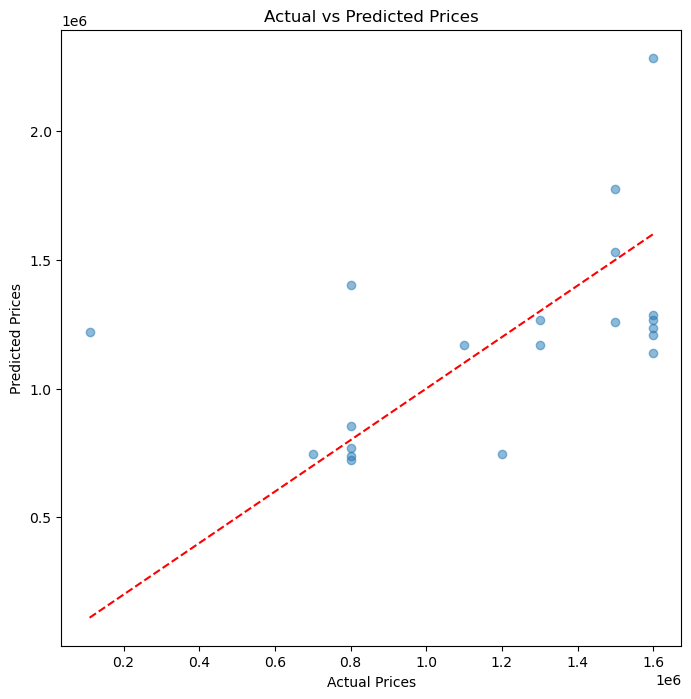

In [81]:
# Plot predictions vs actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [40]:
# Define the model
gbm = GradientBoostingRegressor(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_gbm = best_model.predict(X_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print(f'Gradient Boosting Mean Squared Error: {mse_gbm}')
print(f'Gradient Boosting R^2 Score: {r2_gbm}')

Gradient Boosting Mean Squared Error: 145045421428.21033
Gradient Boosting R^2 Score: 0.17029071386590477


In [42]:
### Improving the model with applying different Machine Learning Algorithms

# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']


In [48]:
# One-hot encoding for categorical variables
categorical_features = ['Profession', 'Marrital Status', 'Education']
numerical_features = ['Age', 'No of Dependents', 'Total Salary']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [49]:
# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgb_model)])


In [50]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}


In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_xgb = best_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')


XGBoost Mean Squared Error: 144214714629.8576
XGBoost R^2 Score: 0.17504264010984416


In [52]:
# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Preprocessing: Encode categorical variables and scale numerical features
categorical_features = ['Profession', 'Marrital Status', 'Education', 'Personal loan']
numerical_features = ['Age', 'No of Dependents', 'Total Salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rf_model)])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 161282896472.03857
Random Forest R^2 Score: 0.07740681794849358


In [53]:
# Function to find outliers using IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Analyze each numerical feature for outliers
numerical_features = ['Age', 'No of Dependents', 'Total Salary', 'Price']
outliers_dict = {feature: find_outliers_iqr(data, feature) for feature in numerical_features}

# Display the outliers for each feature
for feature, outliers in outliers_dict.items():
    print(f"Outliers in '{feature}':")
    print(outliers)
    print("\n")

Outliers in 'Age':
Empty DataFrame
Columns: [Age, Profession, Marrital Status, Education, No of Dependents, Personal loan, Total Salary, Price]
Index: []


Outliers in 'No of Dependents':
    Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
12   29   Salaried         Married  Post Graduate                 0   
16   26   Salaried          Single  Post Graduate                 0   
17   27   Salaried          Single       Graduate                 0   
19   30   Salaried         Married       Graduate                 0   
36   29   Business         Married  Post Graduate                 0   
37   30   Salaried         Married  Post Graduate                 0   
38   30   Business          Single  Post Graduate                 0   
39   31   Salaried         Married       Graduate                 0   
41   32   Business         Married  Post Graduate                 0   
42   32   Salaried         Marr

In [56]:
col=list(data.columns)

In [57]:
col


['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'Total Salary',
 'Price']

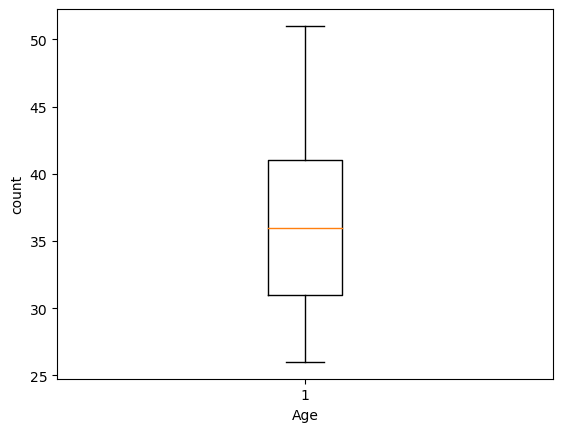

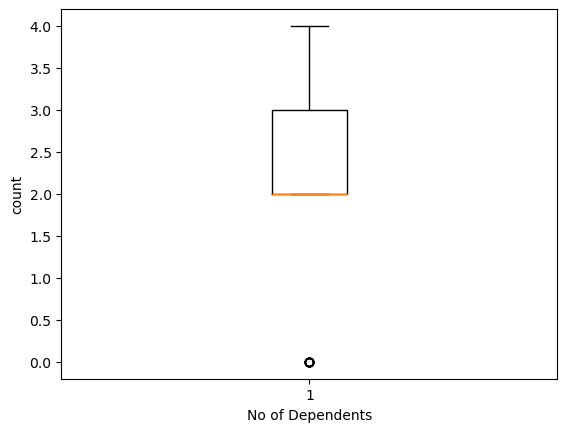

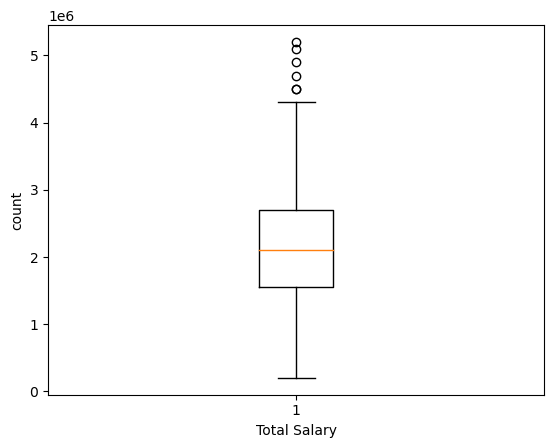

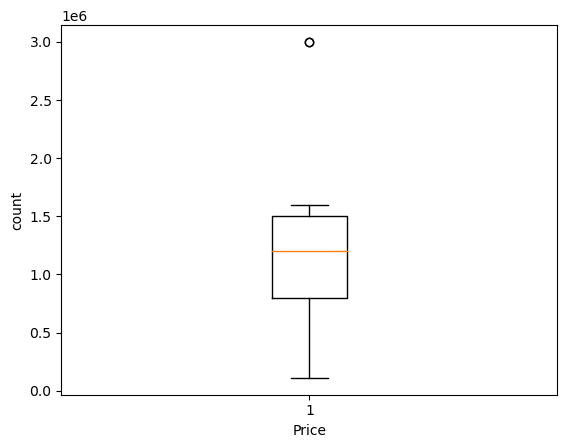

In [61]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [74]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to your dataset
for col_name in ['Age', 'No of Dependents', 'Total Salary', 'Price']:
    data = remove_outliers(data, col_name)


In [75]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
5,28,Salaried,Married,Graduate,3,Yes,900000,700000


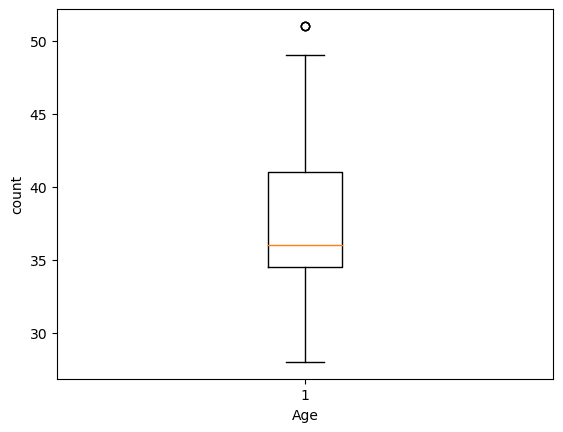

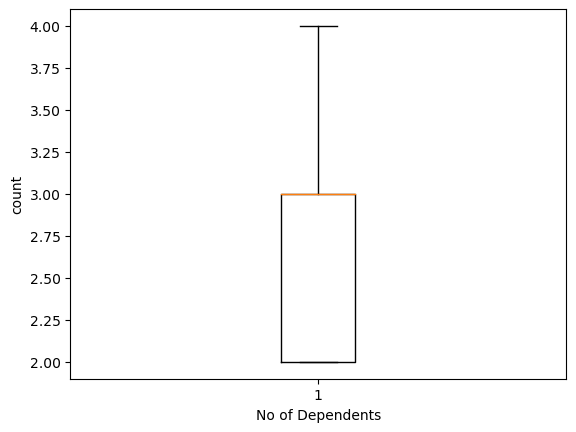

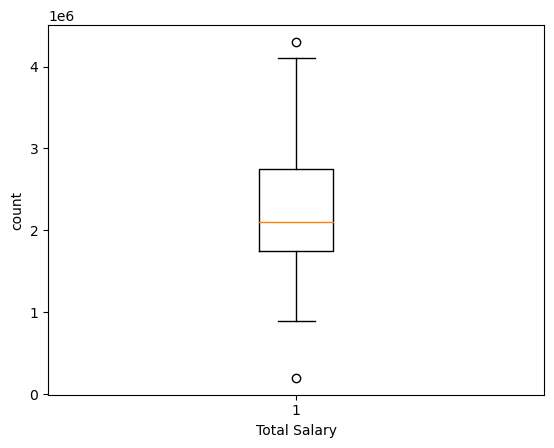

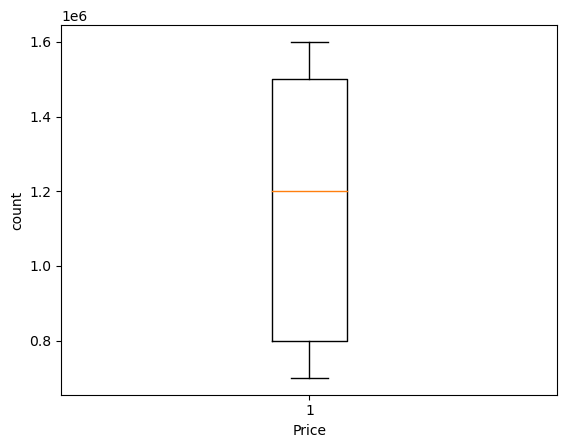

In [76]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [77]:
# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Preprocessing: Encode categorical variables and scale numerical features
categorical_features = ['Profession', 'Marrital Status', 'Education', 'Personal loan']
numerical_features = ['Age', 'No of Dependents', 'Total Salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rf_model)])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 67376721049.65011
Random Forest R^2 Score: 0.3493664276321341
